
# 1. Introduction

This study has been developed for the purposes of the EMPIR project “Metrology for the Factory of the Future” (Met4FoF) -  Activity A1.2.2 of the Work Package 1.Two laboratories in PTB and CEM posses conventional dynamic calibration set-ups for acceleration sensors under test. This section describes different methods for the interlaboratory study on the comparison of measurement results of digital - output acceleration sensor (DUT). The study covered two laboratories with their individual set-ups.  Among in-detailed analysis of the data, three case studies (according to GUM, GUM-S1 and weighted values) were applied as the inputs for the one method of comparison - En values calculation.  The second method of comparison relies on the weighted difference. The analysis required data transformation from time domain signals to the frequency domain, sine approximation and Gaussian error propagation. The selected sensor for acceleration measurements is a three-axial low-g acceleration sensor with digital output, which allows measurements of acceleration in three perpendicular axes. Only an X-axis acceleration was observed during the study. 

## 1.1. State of the art

In conventional dynamic calibration procedures for acceleration sensors, the acceleration used for the sensor input is applied either as **a sinusoidal excitation with a given frequency and amplitude** or as **a singular shock-like excitation characterized by pulse width and intensity**. 
<br>The quantity is then measured by a reference sensor and by the device under test (DUT). The results of DUT are compared to the reference and hence characterized and linked to the SI. In a dynamic calibration situation, the response of the DUT to time-varying input is the major interest. Hence, it is crucial that the mechanical input operates simultaneously and equally on the reference and DUT. Both, the reference and the DUT provide **electrical outputs (typical voltage)** while **the data acquisition electronics** of the system provides **the analogue to digital conversion (ADC).**
In order to connect the reference and the DUT to the ADC system, two analogue channels are needed. In order to get reliable information on the time dependent response, the timing of the data acquisition on the two channels has to be synchronized. This is typically accomplished by provision of a common clock signal to drive the sampling units of the ADC and a common trigger to start (or mark) the beginning of the acquisition. 

## 1.2. The extension of conventional dynamic calibration systems to digital-output sensors 

In a set-up where the DUT is a digital-output sensor,the sampling of the DUT time series is no longer under the control (trigger, clock) of the calibration system. Instead, the DUT comprises its own digitizer unit with a time base independent of the calibration system. In fact, a typical conventional calibration set-up does not provide an input for digital data at all.
The solution to this problem requires two extensions:
1.	A digital acquisition unit (DAU) which is capable to connect to the digital interface of the sensor under calibration and store/transmit the DUT time-series for later analysis
2.	An additional synchronization signal that provides the link between the time-base of the calibration system and the time-base of the DUT.

The concept for the extension of existing facilities for dynamic calibration uses a custom digital acquisition unit microcontroller board with a connected reference time signal for traceable time stamping of acquired data points. This allows for a synchronised data acquisition from the reference measurement and the DUT. 


The selected laboratories posses their set-ups and the calibration items were calibrated in both set-ups.The analysis required transformation from time domain to the frequency domain, where frequencies and corresponding magnitudes and phases were calculated.The measurement conditions were kept according to the laboratory standard conditions. 

Each laboratory submitted HDFT files containing groups:
- EXPERIMENTS - containing 171 files (experiment) corresponding to the sine excitations
- RAWDATA - where data from ADCs (*voltage, absolute time, absolute time uncertainty*)  and sensors (*absolute time, absolute time uncertainty, acceleration, angular velocity, magnetic flux density and temperature*) can be approached during the measurements
- RAWTRANSFERFUNCTION - *this group contains quantities of interest: frequencies, amplitudes, assigned uncertainties of amplitudes, phases,  assigned uncertainties of phases, excitation amplitudes and assigned uncertainties of excitation amplitudes
- REFERENCEDATA - reference data from ADCs and sensors.

Measurement characteristics of DUT are given in the Table 1 below
    
| <b>PTB<b> | Sensor | Internal ADC |
| --- | --- | --- |
| <b>Name<b> | MPU 9250| STM 32 Internal ADC |
| <b>ID<b>  | 535035904 | 535038464 |
| <b>Quantity<b>  | X Acceleration | Voltage  @CH1 |
| <b>Unit<b>  | $\frac{m}{s^{2}}$ | V |    
| <b>Resolution<b>  | 65536,0 (16-bit) | 4096,0 (12-bit) |
| <b>Min. scale<b>  | -156,91439819335938 $\frac{m}{s^{2}}$  | -10 V |
| <b>Max. scale<b>  | 156,90960693359375 $\frac{m}{s^{2}}$  | 10 V |
    
| <b>CEM<b> | Sensor | Internal ADC |
| --- | --- | --- |
| <b>Name<b> | MPU 9250| STM 32 Internal ADC |
| <b>ID<b>  | 3167420416 | 31674422976 |
| <b>Quantity<b>  | X Acceleration | Voltage  @CH1 |
| <b>Unit<b>  | $\frac{m}{s^{2}}$ | V |    
| <b>Resolution<b>  | 65536,0 (16-bit) | 4096,0 (12-bit) |
| <b>Min. scale<b>  | -156,91439819335938 $\frac{m}{s^{2}}$  | -10 V |
| <b>Max. scale<b>  | 156,90960693359375 $\frac{m}{s^{2}}$  | 10 V |
    
    
The calibration range of the study was selected in accordance with the current measurement capabilities of the participating laboratories. The study consisted of ten measurement cycles for PTB and nine measurement cycles for CEM in the frequency range of (10.0 - 250.0)Hz. Each measurement cycle contained seventeen calibration points within the selected frequency range. The individual measurements in the one cycle are called “experiments”. Each calibration point in one cycle was quantified in terms of estimated values and standard deviations of magnitude and phase.  These values arose from the sine-fitting and conversion
of time-domain signals into frequency domain. The provided data sets also include the excitation amplitude values, whose variations from the targeted values are known and not considered.  The CEM’s set-up always starts measurement at frequencies of80.0 Hz and 250.0 Hz respectively, before targeting the calibration point at 10.0Hz. In particular, the magnitude and phase values originating from this characteristic of the CEM’s set-up have not been considered.The measurement conditions were kept according to the laboratory standard conditions.

In [1]:
import h5py
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import scipy.stats as stats
import seaborn as sns

#conda install -c conda-forge miktex in command prompt
import seaborn as sns
#from ipywidgets import widgets, Layout-this is optionally, must be installed 
#from IPython import display - this is optionally
#from ipywidgets import widgets, Layout


In [2]:
#FOR LATEX -takes longer to run plots

plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']# all text in blots bold
#plt.rc('text', usetex=True)# for figure export 
plt.rc('text', usetex=False)# use tex for image export
PLTSCALFACTOR =1.5# change this to scale all plots labels (3 is good for export on 4k screan)
SMALL_SIZE = 12 * PLTSCALFACTOR
MEDIUM_SIZE = 15 * PLTSCALFACTOR
BIGGER_SIZE = 18 * PLTSCALFACTOR

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.linewidth'] = PLTSCALFACTOR

<ipython-input-2-06400834ace8>:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']# all text in blots bold


# 2.Extract the data

Data for ILC comparison is extracted from the HDF5 files separately for PTB and CEM. The extracted data will be sorted by frequency at the end of the Notebook and saved into Excel file.

In [3]:
def extract_data(filename, sensor_index):
    #explore the HDF5 file, folders and subfolders
    with h5py.File(filename,'r') as f:
        base_items=list(f.items())
        print("\nItems in directory", base_items)
        rawtransfer=f.get("RAWTRANSFERFUNCTION")
        rawtransfer_items=list(rawtransfer.items())
        print("\nItems in reference", rawtransfer_items)
        subgroup=rawtransfer.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250")
        subgroup_items=list(subgroup.items())
        print("\n"+sensor_index+"_MPU_9250 items:",subgroup_items)
        subgroup_acceleration=subgroup.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration")
        subgroup_acceleration_items=list(subgroup_acceleration.items())
        print("\nAcceleration items:",subgroup_acceleration_items)
        subgroup_acceleration_5mem=subgroup.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration")
        subgroup_acceleration_5mem_items=list(subgroup_acceleration_5mem.items())
        print("\nAcceleration items_5members:", subgroup_acceleration_5mem_items)
        frequency=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Excitation_frequency")
        frequency_items=list(frequency.items())
        print("\nFrequency", frequency_items)
        magnitude=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Magnitude")
        magnitude_items=list(magnitude.items())
        print("\nMagnitude", magnitude_items)
        phase=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Phase")
        phase_items=list(magnitude.items())
        print("\nPhase", phase_items)
        
        
        #extract frequencies, magnitude, phase, uncertainties and all excitation parameters
        frequency_values=np.array(frequency.get("value"))
        magnitude_values=np.array(magnitude.get("value"))
        magnitude_uncertainties=np.array(magnitude.get("uncertainty"))
        phase_values=np.array(phase.get("value"))
        phase_uncertainties=np.array(phase.get("uncertainty"))
        excitation_freq_items=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Excitation_frequency")
        excitation_freq=np.array(excitation_freq_items.get("value"))
        excitation_amp_items=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Excitation_amplitude")
        excitation_amp=np.array(excitation_amp_items.get("value"))
        excitation_amp_uncertainty=np.array(excitation_amp_items.get("uncertainty"))
        
        #join all necessary data in 2D array
        total_array=np.stack((frequency_values,magnitude_values,magnitude_uncertainties,phase_values, phase_uncertainties,excitation_freq,excitation_amp,excitation_amp_uncertainty), axis=1)
        print("\nArray dimensions:", total_array.shape)
        column_names=["Frequency [Hz]", r"$x_{M},$ [m s^-2/m s^-2]",r"$U_{M},$ [m s^-2/m s^-2]", r"$x_{\phi},$ [rad]", r"$U_{\phi},$ [rad]","Excitation_freq [Hz]",r"$x_{Aexcit},$ [m s^-2/m s^-2]",r"$U_{Aexcit},$ [m s^-2/m s^-2]"]
        whole_dataset=pd.DataFrame(total_array, columns=column_names)
        f.close()
        
        
        return whole_dataset

In [4]:
whole_dataset_PTB = extract_data('MPU9250PTB_v5.hdf5',"0x1fe40000")


Items in directory [('EXPERIMENTS', <HDF5 group "/EXPERIMENTS" (1 members)>), ('RAWDATA', <HDF5 group "/RAWDATA" (2 members)>), ('RAWTRANSFERFUNCTION', <HDF5 group "/RAWTRANSFERFUNCTION" (1 members)>), ('REFERENCEDATA', <HDF5 group "/REFERENCEDATA" (2 members)>)]

Items in reference [('0x1fe40000_MPU_9250', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250" (1 members)>)]

0x1fe40000_MPU_9250 items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration" (1 members)>)]

Acceleration items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration/Acceleration" (11 members)>)]

Acceleration items_5members: [('DUT_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration/Acceleration/DUT_Phase" (2 members)>), ('DUT_SNYNC_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration/Acceleration/DUT_SNYNC_Phase" (2 members)>), ('DUT_amplitude', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/

In [5]:
whole_dataset_PTB.head(2)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
0,10.0,1.019554,0.003273,-0.094684,0.003022,10.0,2.739,0.004891
1,12.5,1.019093,0.004047,-0.118820,0.006455,12.5,2.744,0.007312


Phase data for PTB must be reverted:

In [6]:
["Frequency [Hz]", r"$x_{M},$ [m s^-2/m s^-2]",r"$U_{M},$ [m s^-2/m s^-2]", r"$x_{\phi},$ [rad]", r"$U_{\phi},$ [rad]","Excitation_freq [Hz]",r"$x_{Aexcit},$ [m s^-2/m s^-2]",r"$U_{Aexcit},$ [m s^-2/m s^-2]"]

whole_dataset_PTB[[r"$x_{\phi},$ [rad]"]] = whole_dataset_PTB[[r"$x_{\phi},$ [rad]"]]

In [7]:
whole_dataset_PTB.head(2)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
0,10.0,1.019554,0.003273,-0.094684,0.003022,10.0,2.739,0.004891
1,12.5,1.019093,0.004047,-0.118820,0.006455,12.5,2.744,0.007312


In [8]:
whole_dataset_CEM = extract_data('MPU9250CEM_v5.hdf5',"0xbccb0000")


Items in directory [('EXPERIMENTS', <HDF5 group "/EXPERIMENTS" (1 members)>), ('RAWDATA', <HDF5 group "/RAWDATA" (2 members)>), ('RAWTRANSFERFUNCTION', <HDF5 group "/RAWTRANSFERFUNCTION" (1 members)>), ('REFERENCEDATA', <HDF5 group "/REFERENCEDATA" (2 members)>)]

Items in reference [('0xbccb0000_MPU_9250', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250" (1 members)>)]

0xbccb0000_MPU_9250 items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration" (1 members)>)]

Acceleration items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration/Acceleration" (11 members)>)]

Acceleration items_5members: [('DUT_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration/Acceleration/DUT_Phase" (2 members)>), ('DUT_SNYNC_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration/Acceleration/DUT_SNYNC_Phase" (2 members)>), ('DUT_amplitude', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/

In [9]:
whole_dataset_CEM[[r"$x_{\phi},$ [rad]"]] = whole_dataset_CEM[[r"$x_{\phi},$ [rad]"]]-np.pi
whole_dataset_CEM.head(2)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
0,80.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN
1,250.0,0.643003,0.000891,-2.375412,0.002897,250.0,126.497513,0.125687


# 3.Data analysis

Cycles in CEM's dataset start with 80.0 Hz and 250.0 Hz instead of 10.0 Hz. These starting points are deleted in order to compare the cycles in a range from 10.0 Hz and 250.Hz.

In [10]:
delete_rows=[]

for k in range(0,171,19):
    i=k
    j=k+1
    delete_rows.append(i)
    delete_rows.append(j)
whole_dataset_CEM_new=whole_dataset_CEM.drop(axis=0,index=delete_rows)

In [11]:
def split_data_by_frequencies(dataset):
    dict_of_frequencies=dict(iter(dataset.groupby('Frequency [Hz]')))
    return dict_of_frequencies
    #list_of_frequencies=np.array([10,12.5,16,20,25,31.5,40,46.7,50,53.3,63,80,100,125,160,200,250])

In [12]:
#check if all frequencies are the same
PTB_separated_by_freq=split_data_by_frequencies(whole_dataset_PTB)
CEM_separated_by_freq=split_data_by_frequencies(whole_dataset_CEM)
CEM_separated_by_freq_new=split_data_by_frequencies(whole_dataset_CEM_new)
print("Frequencies - PTB:",PTB_separated_by_freq.keys())
print("Frequencies - CEM:",CEM_separated_by_freq.keys())

Frequencies - PTB: dict_keys([10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0])
Frequencies - CEM: dict_keys([10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0])


In [13]:
PTB_separated_by_freq.get(10).head(1)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
0,10.0,1.019554,0.003273,-0.094684,0.003022,10.0,2.739,0.004891


In [14]:
CEM_separated_by_freq_new.get(10).head(1)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
2,10.0,1.016209,0.004893,-0.094907,0.001665,10.0,2.754331,0.00586


In [15]:
q_names=list(PTB_separated_by_freq.get(10).columns)
list_of_freq=[10,12.5,16,20,25,31.5,40,46.7,50,53.3,63,80,100,125,160,200,250]

# 4. En values

The En values for Magnitude, Phase and Excitation amplitude have been calculated according to formula on the figure:

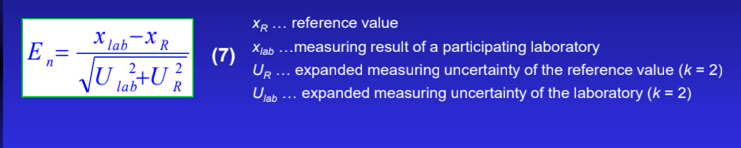

<br>$x_{lab}$ corresponds to the mean value at a specific frequency for the participating laboratory and
<br>$x_{ref}$ corresponds to the mean value at a specific frequency for the reference laboratory 
<br>$U_{lab}$ corresponds to the expanded measurement uncertainty of the mean value at a specific frequency for the participating laboratory 
<br>$U_{ref}$ corresponds to the expanded measurement uncertainty of the mean value at a specific frequency for the reference laboratory 
<br>If:<br> |En|<=1.1 - the criteria is satisfied (the original condition is that |En|<=1.0. However, because of the practical reasons, this limit is sometimes enlarged for 10%).
<br>|En|>1.1 - the criteria is not satisfied.
<br>One of the laboratories has been selected as a reference laboratory and other as a participating laboratory.This sequence is not important because it affects only the sign. That is why an absolute values are taken into account. 


## 4.1 The function for En values

In [16]:
def calculate_En_values(df1,df2,names):
    En_values=np.empty((df1.shape[0],2))
    
    for i in range (df1.shape[0]):
        
        En_values[:,0]=np.abs(((df1[names[0]].values-df2[names[0]].values)/(2*(np.sqrt(df1[names[1]].values**2 +df2[names[1]].values**2)))))
        En_values[:,1]=np.abs(((df1[names[2]].values-df2[names[2]].values)/(2*(np.sqrt(df1[names[3]].values**2 +df2[names[3]].values**2)))))
        #En_values[:,2]=np.abs(((df1[names[4]].values-df2[names[4]].values)/(2*(np.sqrt(df1[names[5]].values**2 +df2[names[5]].values**2))))) 
          
    return En_values  

# 5. Case study 3: Calculate En values for Monte Carlo method

## 5.1 Best estimates and standard uncertainties


If it is assumed that each experiment is based on at least 30 single values, then the normal distribution can be proposed:
$$X \hookrightarrow  \mathcal{N}(x_{M_{,i}},\,\sigma _{M_{,i}}^{2})$$
where $\sigma _{M_{,i}}$ is calculated as   $\frac{U _{M_{,i}}}{2}$.

The same approach refers to the phase values: 
$$X \hookrightarrow  \mathcal{N}(x_{\phi_{,i}},\,\sigma _{\phi_{,i}}^{2})$$
where $\sigma _{\phi_{,i}}$ is calculated as   $\frac{U _{\phi_{,i}}}{2}$. In both cases, *i* refers to the number of experiments at a given frequency (*i*=10 for PTB and *i*=9 for CEM).

The Monte Carlo approach refers tocollection of samples from the probability distributions, which are defined as normal and by statistics (the mean and standard deviation) for every experiment.  Samples from different experiments are then used to calculate the estimate of the output quantity and the associated standard uncertainty at given frequencies within the calibration range. These estimates arethen used to calculate the En values.

In [17]:
def MC(dictionary, names):
    keys =list(dictionary.keys())
    sample_size=30
    dict_val=list(dictionary.values())

    MC_RESULTS=np.empty((len(dictionary.values()),6))

    p=0.05
    q=p*sample_size
    r= (sample_size-q)/2
    q = p*sample_size
    x_low=np.empty(len(dictionary.values()))
    x_high=np.empty(len(dictionary.values()))

    y_low=np.empty(len(dictionary.values()))
    y_high=np.empty(len(dictionary.values()))

    z_low=np.empty(len(dictionary.values()))
    z_high=np.empty(len(dictionary.values()))
    for val, val_in_list in zip(dictionary.values(), range(len(dict_val))):
            X_var=np.empty((len(dictionary.values()),val.shape[0],sample_size))
            Y_var=np.empty((len(dictionary.values()),val.shape[0],sample_size))
            Z_var=np.empty((len(dictionary.values()),val.shape[0],sample_size))
            for item in range(len(val)): #ispraviti
                X_var[val_in_list,item,:]=(np.random.normal(loc=val[r"$x_{M},$ [m s^-2/m s^-2]"].values[item], scale=val[r"$U_{M},$ [m s^-2/m s^-2]"].values[item]/2, size=sample_size))
                Y_var[val_in_list,item,:]=(np.random.normal(loc=val[r"$x_{\phi},$ [rad]"].values[item], scale=val[r"$U_{\phi},$ [rad]"].values[item]/2, size=sample_size))
                Z_var[val_in_list,item,:]=(np.random.normal(loc=val[r"$x_{Aexcit},$ [m s^-2/m s^-2]"].values[item], scale=val[r"$U_{Aexcit},$ [m s^-2/m s^-2]"].values[item]/2, size=sample_size))
            x=X_var[val_in_list].mean(axis=0)
            y=Y_var[val_in_list].mean(axis=0)
            z=Z_var[val_in_list].mean(axis=0)
            x_low[val_in_list]=x[int(r)]
            x_high[val_in_list]=x[int(r+q)]
            y_low[val_in_list]=y[int(r)]
            y_high[val_in_list]=y[int(r+q)]
            z_low[val_in_list]=z[int(r)]
            z_high[val_in_list]=z[int(r+q)]

            MC_RESULTS[val_in_list,0]=x.mean()
            MC_RESULTS[val_in_list,1]=np.sqrt((np.sum((x-x.mean())**2)/(sample_size-1)))
            MC_RESULTS[val_in_list,2]=y.mean()
            MC_RESULTS[val_in_list,3]=np.sqrt((np.sum((y-y.mean())**2)/(sample_size-1)))
            MC_RESULTS[val_in_list,4]=z.mean()
            MC_RESULTS[val_in_list,5]=np.sqrt((np.sum((z-z.mean())**2)/(sample_size-1)))
            list_of_freq=[10,12.5,16,20,25,31.5,40,46.7,50,53.3,63,80,100,125,160,200,250]
            index=list_of_freq
    MC_RESULTS=pd.DataFrame(MC_RESULTS, columns=names,index=index)

    return MC_RESULTS
    

In [18]:
column_names_list1=[r"$\bar{x}_{M},$ [m s^-2/m s^-2]",r"$u_{M},$ [m s^-2/m s^-2]",r"$\bar{x}_{\phi},$ [rad]",r"$u_{\phi},$ [rad]",r"$\bar{x}_{Aexcit},$ [m s^-2/m s^-2]",r"$u_{Aexcit},$ [m s^-2/m s^-2]"]
#column_names_list1  =[name for name in q_names if name != 'Frequency [Hz]' and name!='Excitation_freq [Hz]']
MC_values_PTB=MC(PTB_separated_by_freq,column_names_list1)
MC_values_CEM=MC(CEM_separated_by_freq_new,column_names_list1)


In [19]:
MC_values_PTB.head(2)

,"$\bar{x}_{M},$ [m s^-2/m s^-2]","$u_{M},$ [m s^-2/m s^-2]","$\bar{x}_{\phi},$ [rad]","$u_{\phi},$ [rad]","$\bar{x}_{Aexcit},$ [m s^-2/m s^-2]","$u_{Aexcit},$ [m s^-2/m s^-2]"
10.0,1.019069,0.000772,-0.094769,0.000559,2.750746,0.001153
12.5,1.018331,0.000555,-0.118614,0.001023,2.755781,0.001470


In [20]:
MC_values_CEM.head(2)

,"$\bar{x}_{M},$ [m s^-2/m s^-2]","$u_{M},$ [m s^-2/m s^-2]","$\bar{x}_{\phi},$ [rad]","$u_{\phi},$ [rad]","$\bar{x}_{Aexcit},$ [m s^-2/m s^-2]","$u_{Aexcit},$ [m s^-2/m s^-2]"
10.0,1.016071,0.000547,-0.094965,0.000370,2.753313,0.000544
12.5,1.016045,0.000495,-0.118506,0.000321,2.729444,0.000696


In [21]:
En_values_MC_=calculate_En_values(MC_values_PTB,MC_values_CEM,column_names_list1)

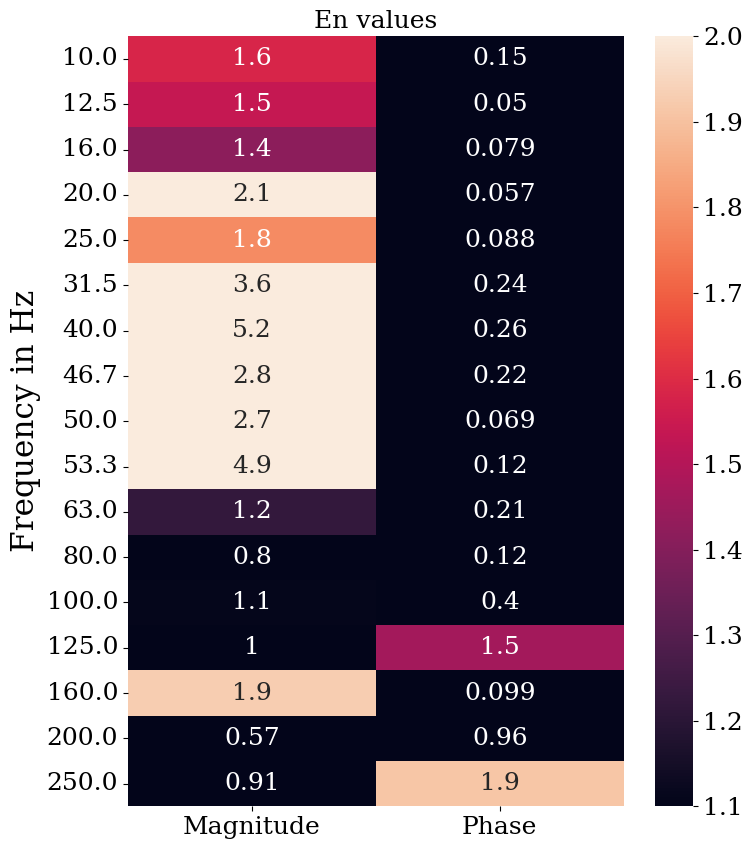

In [22]:
plt.figure(figsize=(8,10))
sns.heatmap(En_values_MC_, vmax=2, vmin=1.1,annot=True,yticklabels=PTB_separated_by_freq.keys(),xticklabels=["Magnitude","Phase"] )
plt.title("En values")
plt.ylabel("Frequency in Hz")
plt.show()

The results are similar to those obtained by the second approach and show good agreement for the phase values at frequencies lower than 125.0 Hz, while the En values of magnitudes are sensitive to the sample size and decreases at higher frequencies. <br>*Note: it is not sure whether the sampling is an applicable option for measurement procedure by the acceleration sensor. Also, as the sample size can be changed, iterations can be made to examine its effect and randomness on the quantities of interest.*

# Conclusion

All approaches incorporated through En values show disagreement in magnitude values,while the phase values satisfy the set criteria at frequencies up to 100.0 Hz (Case study6
2 and 3) and up to 80 Hz (Case study 1).   When considering the above mentioned approaches, some limitations exist for the Case study 1 (the assumption of the equal variance)and Case study 3 (sampling and sampling size).  However, all three approaches show thehighest En values for magnitude in a mid-range of frequencies, which is in line with the trends shown in Introduction data analysis, especially in the range (31.5 – 53.3) Hz.  All three approaches are also aligned with plots in Introduction data analysis in terms of phase.  High En values in upper frequencies correspond to the area of a small peak around 160.0 Hz in averaged CV.  It is worth noting that current calculation relies only on statistical uncertainty contribution. Therefore,it includes only type A information, without additional sources from the Type B uncertainty evaluation. This means that the possible implications and effects coming from other sources(mechanisms, environmental conditions, etc.)  were not taken into account.  Nevertheless,some current mechanical problems and behaviour of both set-ups are known and mightcause disagreement of results, especially for the magnitude. The effect of temperature also requires further analysis since a potential relation was identifies.  The position of the temperature sensor is also to be considered. If the temperature is not affected by the presenceof people, the change of magnitude and phase shows opposite behaviour in a relation to the change of temperature. Additionally, the Pearson correlation coefficients between temperature and magnitude; temperature and phase were calculated at each frequency for PTB and CEM. The correlation coefficients demonstrate moderately strong or very strong negative correlation (based on some guidelines).  Nevertheless, a 95% confidence interval has been calculated for the correlation coefficient at each frequency. The lower and upper limits of aconfidence interval for correlation coefficients have different sign at all frequencies except 40.0 Hz for PTB and at all frequencies except 160.0 Hz for CEM which means that it cannot be fully accepted that the correlation is negative. The correlation was further examined by significance testing (p-value can be calculated. The null hypothesis that states that there is no relationships between magnitude and temperature can be rejected at frequencies 40.0Hz and for PTB and at 160.0 Hz for CEM because the p-values are less than 0.05. The null hypothesis that states that there is no relationships between phase and temperature can berejected only at a frequencies of 20.0 Hz and 50.0 Hz for PTB because the p-value is less than0.05. Note that Pearson correlation also refers to the measure of the linear relationship. 

# References

[1] https://www.investopedia.com/terms/c/coefficientofvariation.asp
<br>[2] https://en.wikipedia.org/wiki/Weighted_arithmetic_mean
<br>[3] https://en.wikipedia.org/wiki/Effective_sample_size
<br>[4] https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1
<br>[5] https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/